In [2]:
import os
import pandas as pd
import numpy as np
data_folder = os.path.join(os.path.expanduser("~"), "Data")
data_filename = os.path.join(data_folder, "Ads", "ad.data")
os.path.join?
print(data_filename)
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

from collections import defaultdict
converters = defaultdict(convert_number)  #{i: convert_number for i in range(1558)}
converters[1558] = lambda x: 1 if x.strip() == "ad." else 0

ads = pd.read_csv(data_filename, header=None, converters=converters)
ads = ads.applymap(lambda x: 0 if isinstance(x, str) and x.strip() == "?" else x)

ads[[0, 1, 2]] = ads[[0, 1, 2]].astype(float)
ads[:20]

/Users/yt/Data/Ads/ad.data


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59.0,460.0,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60.0,234.0,3.9000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#ads = ads.astype(float).dropna()
X = ads.drop(1558, axis=1).values
y = ads[1558]
X.shape

(3279, 1558)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X, y, scoring='accuracy')
print("The average score is {:.4f}".format(np.mean(scores)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The average score is 0.9478


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)
Xd[:5]

array([[  2.72710703e+01,   7.47716293e+01,   5.96950399e-01,
         -4.15855548e-01,   5.40851748e-01],
       [  3.50706443e+02,  -5.81844253e+01,  -5.28699505e+00,
         -6.04396041e-02,  -5.55201441e-01],
       [  1.12598330e+02,  -3.58789070e+01,  -1.99605426e-02,
         -3.78861362e-01,  -4.97214146e-01],
       [  3.51278356e+02,  -5.52296876e+01,  -5.60007647e+00,
         -1.69161606e-02,  -7.67265044e-01],
       [  3.51277782e+02,  -5.52294194e+01,  -5.58832183e+00,
         -1.26908747e-03,  -9.76458700e-01]])

In [6]:
Xd.shape

(3279, 5)

In [7]:
np.set_printoptions(precision=3, suppress=True)
pca.explained_variance_ratio_

array([ 0.878,  0.121,  0.001,  0.   ,  0.   ])

In [8]:

pca.components_[0]

array([ 0.193,  0.981,  0.023, ...,  0.   ,  0.   ,  0.   ])

In [9]:
clf = DecisionTreeClassifier(random_state=14)
scores_reduced = cross_val_score(clf, Xd, y, scoring='accuracy')
print("The average score from the reduced dataset is {:.4f}".format(np.mean(scores_reduced)))

The average score from the reduced dataset is 0.9390


0 red
[False False False ...,  True  True  True]
[-119.54  -119.54    -3.676 ...,    2.731 -119.541  -72.547]
1 green
[ True  True  True ..., False False False]
[  27.271  350.706  112.598  351.278  351.278  351.278  343.238  121.679
  351.281  351.281 -119.54   -51.112  -43.263  -43.263  112.598  351.281
  351.282   27.271  351.281  460.505  -43.263  -43.263  -43.262  -43.263
 -119.54   -51.111  -43.263  351.277  121.677  121.677  -21.579    9.82
    9.925  351.284  351.279  351.279  279.001  351.278  351.278   -4.868
   -4.868   -4.868   -4.868  351.285   27.271  351.279  351.279  351.283
   27.274  351.278  351.279    9.815  351.281  351.281  351.282   27.273
  351.28    26.305  351.28   121.678  121.679  351.282 -119.539 -119.539
 -119.539 -119.539  351.28  -117.167    9.815   15.69    27.276   27.274
 -119.539  351.279  351.281  351.281  121.676   13.605  351.281  -25.573
  -25.573  -25.573  351.283  -25.573  -25.573  -25.573   27.273  351.282
  351.281  351.28   351.28   351.277 

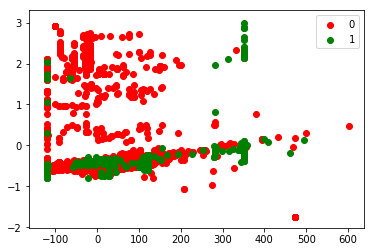

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
classes = set(y)
colors = ['red', 'green']
zip?
for cur_class, color in zip(classes, colors):
    print(cur_class, color)
    mask = (y == cur_class).values
    print(mask)
    plt.scatter(Xd[mask,0], Xd[mask,3], marker='o', color=color, label=int(cur_class))
    print(Xd[mask,0])
plt.legend()
plt.scatter?
plt.show()